In [290]:
import pandas as pd




In [291]:
data = pd.read_csv("NY-House-Dataset.csv")

In [292]:
data.head()
data.tail()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
4796,Brokered by COMPASS,Co-op for sale,599000,1,1.0,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.0,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.0,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398
4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1.0,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752
4800,Brokered by Nyc Realty Brokers Llc,Co-op for sale,349000,1,1.0,750.000000,460 Neptune Ave Apt 14O,"Brooklyn, NY 11224","460 Neptune Ave Apt 14OBrooklyn, NY 11224",New York,Kings County,Brooklyn,Coney Island,460,"460 Neptune Ave #14a, Brooklyn, NY 11224, USA",40.579147,-73.970949


In [293]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [294]:
data["PRICE"].describe().round(2)

count    4.801000e+03
mean     2.356940e+06
std      3.135525e+07
min      2.494000e+03
25%      4.990000e+05
50%      8.250000e+05
75%      1.495000e+06
max      2.147484e+09
Name: PRICE, dtype: float64

In [295]:
data.nlargest(10, 'PRICE')[['PRICE', 'ADDRESS', 'BEDS', 'BATH', 'PROPERTYSQFT']]

expensive = data[data['PRICE'] > 10000000]
print(f"Properties over $10M: {len(expensive)}")

Properties over $10M: 157


In [296]:
# Remove properties over $500M (clearly data errors)
data = data[data['PRICE'] < 500000000]

In [297]:
print(f"Max price after cleaning: ${data['PRICE'].max():,}")
print(f"New dataset size: {len(data)}")

Max price after cleaning: $195,000,000
New dataset size: 4800


In [298]:
print("Before cleaning:", len(data))

# Remove obvious pricing errors
data = data[data['PRICE'] >= 50000]    # Remove sub-$50K (impossible in NYC)
data = data[data['PRICE'] <= 500000000]  # Remove over $100M (extreme outliers)

# Reset index after filtering
data = data.reset_index(drop=True)

print("After cleaning:", len(data))
print(f"New price range: ${data['PRICE'].min():,} to ${data['PRICE'].max():,}")

Before cleaning: 4800
After cleaning: 4796
New price range: $60,000 to $195,000,000


In [299]:
stats = data.describe().round(2)
stats["PRICE"] = round(stats["PRICE"], 2)

In [300]:
stats

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.796000e+03,4796.00,4796.00,4796.00,4796.00,4796.00
mean,1.911619e+06,3.36,2.37,2182.87,40.71,-73.94
std,4.930918e+06,2.60,1.95,2375.62,0.09,0.10
min,6.000000e+04,1.00,0.00,230.00,40.50,-74.25
25%,4.990000e+05,2.00,1.00,1200.00,40.64,-73.99
50%,8.250000e+05,3.00,2.00,2184.21,40.73,-73.95
75%,1.495000e+06,4.00,3.00,2184.21,40.77,-73.87
max,1.950000e+08,50.00,50.00,65535.00,40.91,-73.70


In [301]:
data.isna().sum().sum()

np.int64(0)

In [302]:
data.duplicated().sum()

np.int64(214)

In [303]:
# Remove duplicates
data = data.drop_duplicates()

In [304]:
data.columns

Index(['BROKERTITLE', 'TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT',
       'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2',
       'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME',
       'FORMATTED_ADDRESS', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [305]:
# Remove non-active listing types
data = data[~data['TYPE'].str.contains('Coming Soon|Pending', case=False, na=False)]

In [306]:
data.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


<Axes: title={'center': 'Average Price by Number of Beds'}, xlabel='BEDS'>

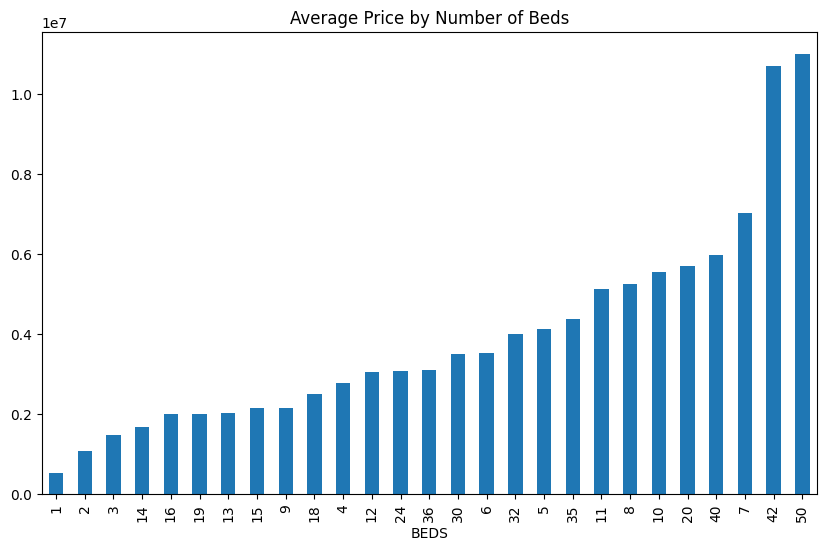

In [307]:
data.groupby("BEDS")['PRICE'].mean().round(2).sort_values(ascending=True).plot(kind='bar', figsize=(10, 6), title='Average Price by Number of Beds')

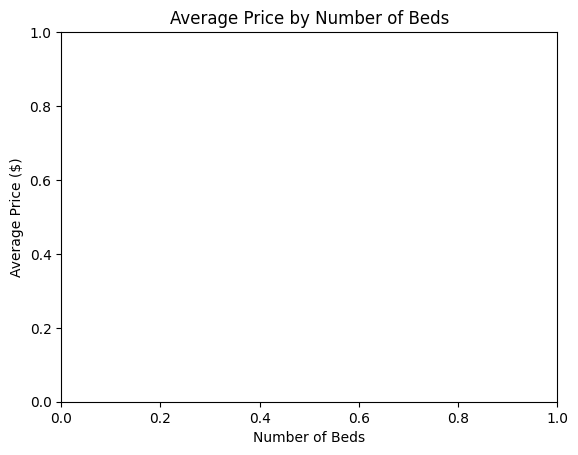

In [308]:
import matplotlib.pyplot as plt

plt.title("Average Price by Number of Beds")
plt.xlabel("Number of Beds")
plt.ylabel("Average Price ($)")
plt.show()

In [309]:
data.columns

Index(['BROKERTITLE', 'TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT',
       'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2',
       'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME',
       'FORMATTED_ADDRESS', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [310]:
data[['BEDS', 'BATH']]

,BEDS,BATH
0,2,2.000000
1,7,10.000000
2,4,2.000000
3,3,1.000000
4,7,2.373861
...,...,...
4791,1,1.000000
4792,1,1.000000
4793,1,1.000000
4794,2,1.000000


In [311]:
# Use the location columns from your dataset
x = data[['BEDS', 'BATH', 'PROPERTYSQFT', 'TYPE', 'LOCALITY', 'SUBLOCALITY']]
y = data['PRICE']

# Check loactions
print("Localities (boroughs):")
print(data['LOCALITY'].value_counts())

print("\nSublocalities (neighborhoods):")  
print(data['SUBLOCALITY'].value_counts().head(10))

Localities (boroughs):
LOCALITY
New York           2259
New York County     891
Queens County       515
Kings County        411
Bronx County        166
Richmond County      56
United States        36
Brooklyn              6
Queens                6
The Bronx             4
Flatbush              1
Name: count, dtype: int64

Sublocalities (neighborhoods):
SUBLOCALITY
New York           927
Kings County       653
Queens County      607
Queens             513
Richmond County    430
Brooklyn           411
Bronx County       285
New York County    263
The Bronx          168
Staten Island       56
Name: count, dtype: int64


In [312]:
x

,BEDS,BATH,PROPERTYSQFT,TYPE,LOCALITY,SUBLOCALITY
0,2,2.000000,1400.000000,Condo for sale,New York,Manhattan
1,7,10.000000,17545.000000,Condo for sale,New York,New York County
2,4,2.000000,2015.000000,House for sale,New York,Richmond County
3,3,1.000000,445.000000,Condo for sale,New York,New York County
4,7,2.373861,14175.000000,Townhouse for sale,New York,New York County
...,...,...,...,...,...,...
4791,1,1.000000,2184.207862,Co-op for sale,New York County,New York
4792,1,1.000000,2184.207862,Co-op for sale,New York,Queens County
4793,1,1.000000,2184.207862,Co-op for sale,New York,New York County
4794,2,1.000000,655.000000,Condo for sale,Queens County,Queens


In [313]:
print(data['TYPE'].value_counts())

TYPE
Co-op for sale                1387
House for sale                 965
Condo for sale                 842
Multi-family home for sale     699
Townhouse for sale             288
Contingent                      87
Land for sale                   46
For sale                        18
Foreclosure                     14
Condop for sale                  4
Mobile house for sale            1
Name: count, dtype: int64


In [314]:
# Remove non-standard sale types
types_to_remove = ['Contingent', 'Foreclosure', 'Land for sale']
data = data[~data['TYPE'].isin(types_to_remove)]

print(f"Dataset size after removing non-standard types: {len(data)}")

Dataset size after removing non-standard types: 4204


In [315]:
print("Before cleaning:", len(data))

# Apply both filters and save to data_final
data_final = data[data['PRICE'] <= 100000000]
data_final = data_final[data_final['PRICE'] >= 50000]

print("After cleaning:", len(data_final))
print(f"Removed: {len(data) - len(data_final)} properties")
print(f"New price range: ${data_final['PRICE'].min():,} to ${data_final['PRICE'].max():,}")

Before cleaning: 4204
After cleaning: 4203
Removed: 1 properties
New price range: $60,000 to $65,000,000


In [316]:
y

0          315000
1       195000000
2          260000
3           69000
4        55000000
          ...    
4791       599000
4792       245000
4793      1275000
4794       598125
4795       349000
Name: PRICE, Length: 4351, dtype: int64

In [317]:
data.shape[0] * 0.2

840.8000000000001

In [318]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [319]:
from sklearn.model_selection import GridSearchCV

In [320]:
X_encoded = pd.get_dummies(x, drop_first=True)
x_train, x_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [321]:
from sklearn.tree import DecisionTreeRegressor
param_grid = {
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse'],  # ONLY these 3
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [322]:
tree_model = DecisionTreeRegressor(random_state=42)


In [323]:
grid_tree = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

In [324]:
grid_tree.fit(x_train, y_train)

,estimator,DecisionTreeR...ndom_state=42)
,param_grid,"{'criterion': ['squared_error', 'absolute_error', ...], 'max_depth': [5, 10, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'absolute_error'


In [325]:
grid_tree.best_params_

{'criterion': 'absolute_error',
 'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 10}

In [326]:
grid_tree.predict(x_test)

array([  772500. ,   732499.5,   294000. ,   648998. ,  1580000. ,
         469888. ,   594900. ,   789444. ,  2345000. ,  8247500. ,
        2150000. ,   425000. ,  4997500. ,   804000. ,   220000. ,
        1185500. ,   371500. ,   462000. ,  1250000. ,  1875000. ,
         237000. ,   371500. ,  1875000. ,  9850000. ,   259000. ,
         669000. ,   442500. ,   425000. ,  4075000. ,   425000. ,
        1455000. ,   899000. ,   569000. ,  1035000. ,   394992.5,
       13950000. ,   779500. ,  1419000. ,  1580000. ,   475000. ,
        1273000. ,  1195000. ,   220000. ,  2150000. ,   798999.5,
        4950000. ,  1489500. ,  6500000. ,  4075000. ,   850000. ,
        6850000. ,   555000. ,   842000. ,   762000. ,   749444. ,
         762000. ,   999000. ,   849000. ,   359250. ,  1350000. ,
        2775000. ,   459000. ,   699999. ,   449000. ,  1224999.5,
         371500. ,   585000. ,   259000. ,   259000. ,   259000. ,
         680000. ,  4950000. ,   297000. ,   479000. ,   25900

In [327]:
tree_pred = grid_tree.predict(x_test)

In [328]:
from sklearn.metrics import mean_absolute_error, r2_score
mse = mean_absolute_error(y_test, tree_pred)
mse

811581.1572904707

In [329]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


In [330]:
lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [331]:
predslr = lr.predict(x_test)

In [332]:
mean_absolute_error(y_test, predslr)

1347928.6269408537

In [333]:
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor(random_state=42)

In [334]:
param_gridfr = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, 20, None]
}

In [335]:
gridfr = GridSearchCV(rfrmodel, param_gridfr)
gridfr.fit(x_train, y_train)

,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [5, 10, ...], 'n_estimators': [50, 100, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [336]:
gridfr.best_params_

{'max_depth': 10, 'n_estimators': 200}

In [337]:
rfrpredictions = gridfr.predict(x_test)

In [338]:
mean_absolute_error(y_test, rfrpredictions)


813175.8973978787

In [339]:
gridfr

,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [5, 10, ...], 'n_estimators': [50, 100, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [340]:
import joblib
joblib.dump(gridfr,"model.pkl")

['model.pkl']

In [341]:
x.columns

Index(['BEDS', 'BATH', 'PROPERTYSQFT', 'TYPE', 'LOCALITY', 'SUBLOCALITY'], dtype='object')